## K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

### EDA

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# Droping the columns which are not required for forming clusters 

df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis = 1, inplace = True)

In [9]:
# Review the info again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [10]:
# Check for Duplicates
dups = df.duplicated().sum()
print(f"Number of duplicated rows: {dups}")

Number of duplicated rows: 0


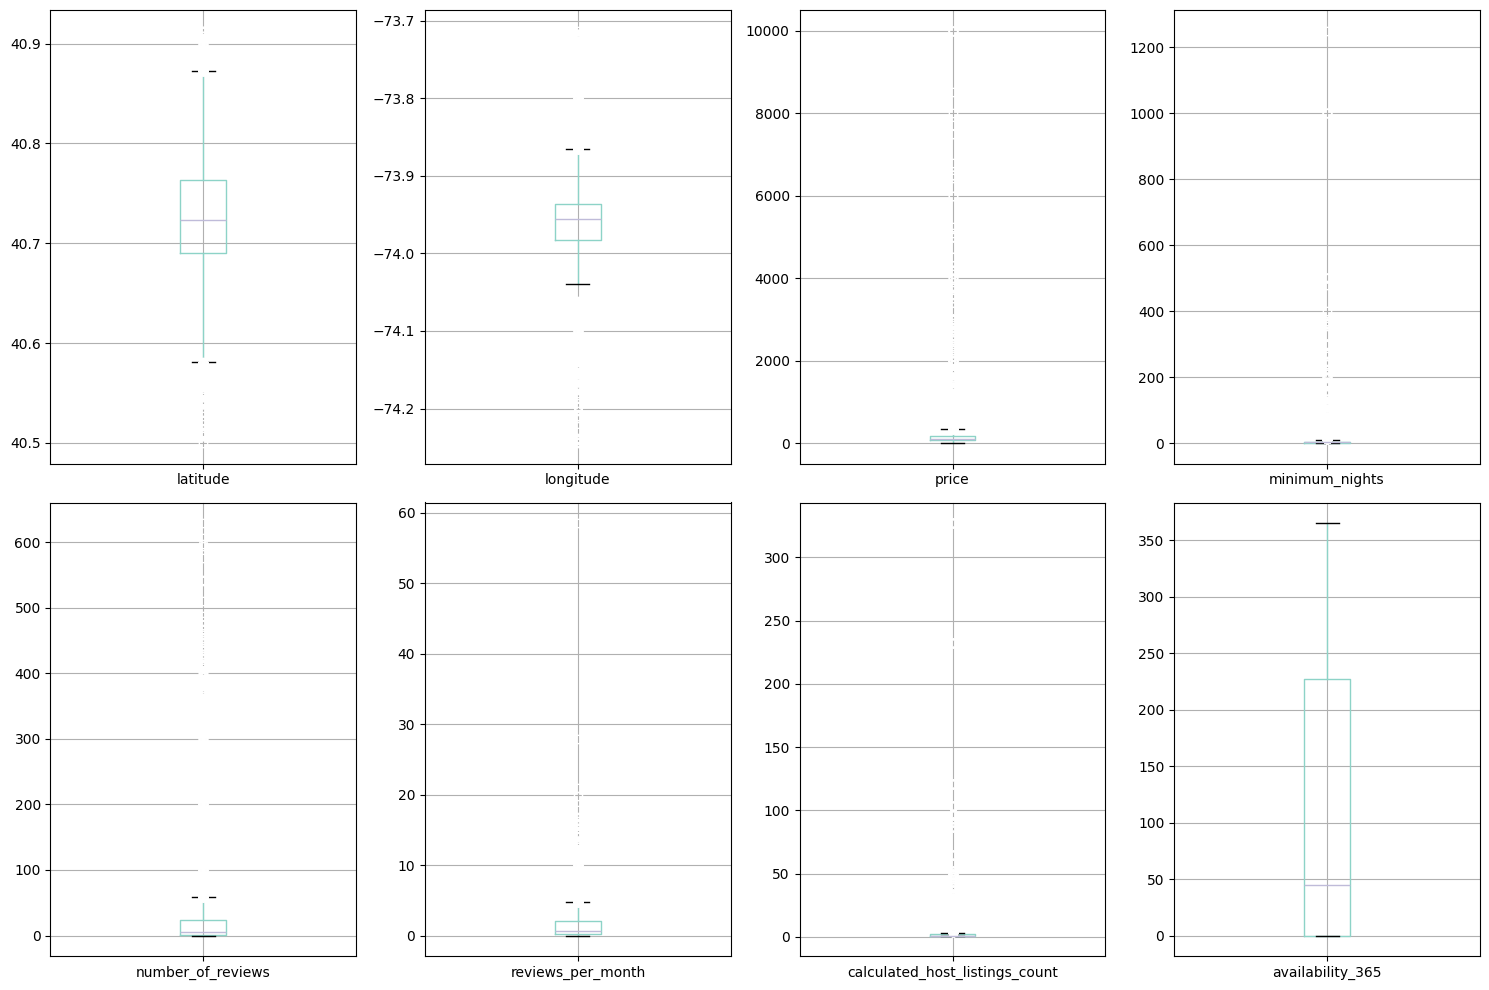

In [11]:
# Check for Outliers

numeric_cols = df.select_dtypes(include = [np.number]).columns.tolist()
fig, axes = plt.subplots(2, 4, figsize = (15, 10))
axes = axes.flatten()
plt.style.use('dark_background')

for i, col in enumerate(numeric_cols[:8]):
    df.boxplot(column = col, ax = axes[i])

plt.tight_layout()
plt.show()

In [12]:
# No outliers are present
# Check for missing values

df.isnull().sum() 

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
df.isnull().mean() * 100

neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

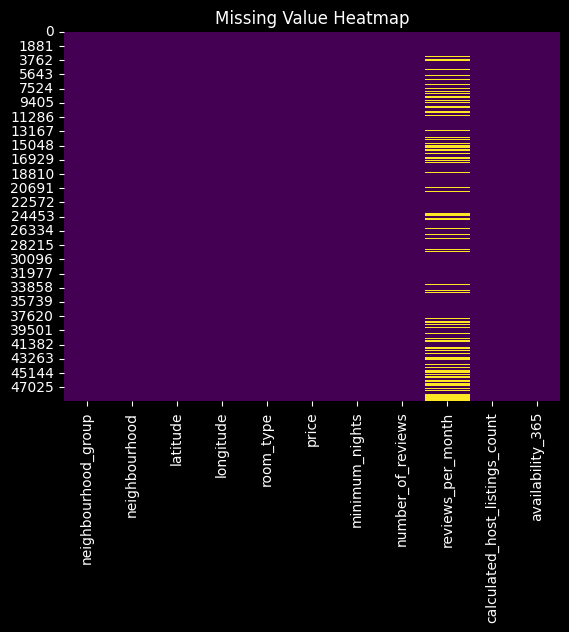

In [14]:
# Visulaize missing values using heatmap
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [15]:
# Treating Missing Values

# Replacing null values in numerical columns using median
median_1 = df['reviews_per_month'].median()
df['reviews_per_month'].replace(np.nan, median_1, inplace = True)

In [16]:
# Chcek if missing values are removed or not

df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Univariate Analysis

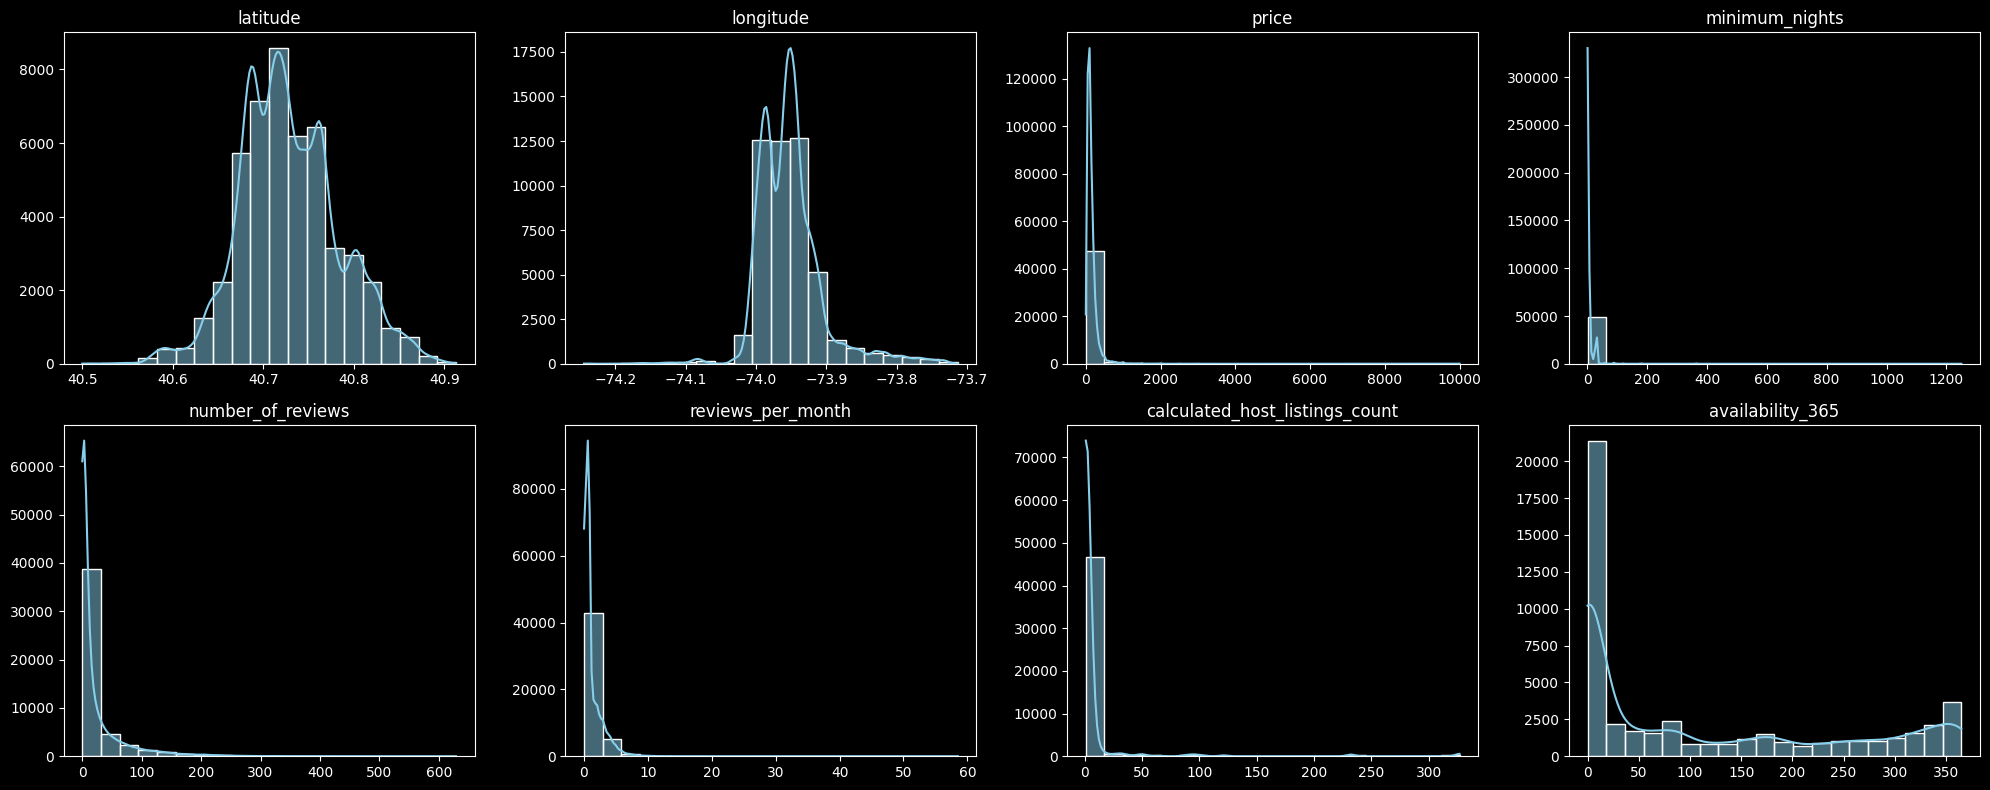

In [17]:
# Adjust grid dimensions
rows, cols = 2, 4
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # 2 rows, 5 columns
axes = axes.flatten()  # flatten axes to 1D array for easy looping

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde = True, bins = 20, ax = axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### Bivariate Analysis

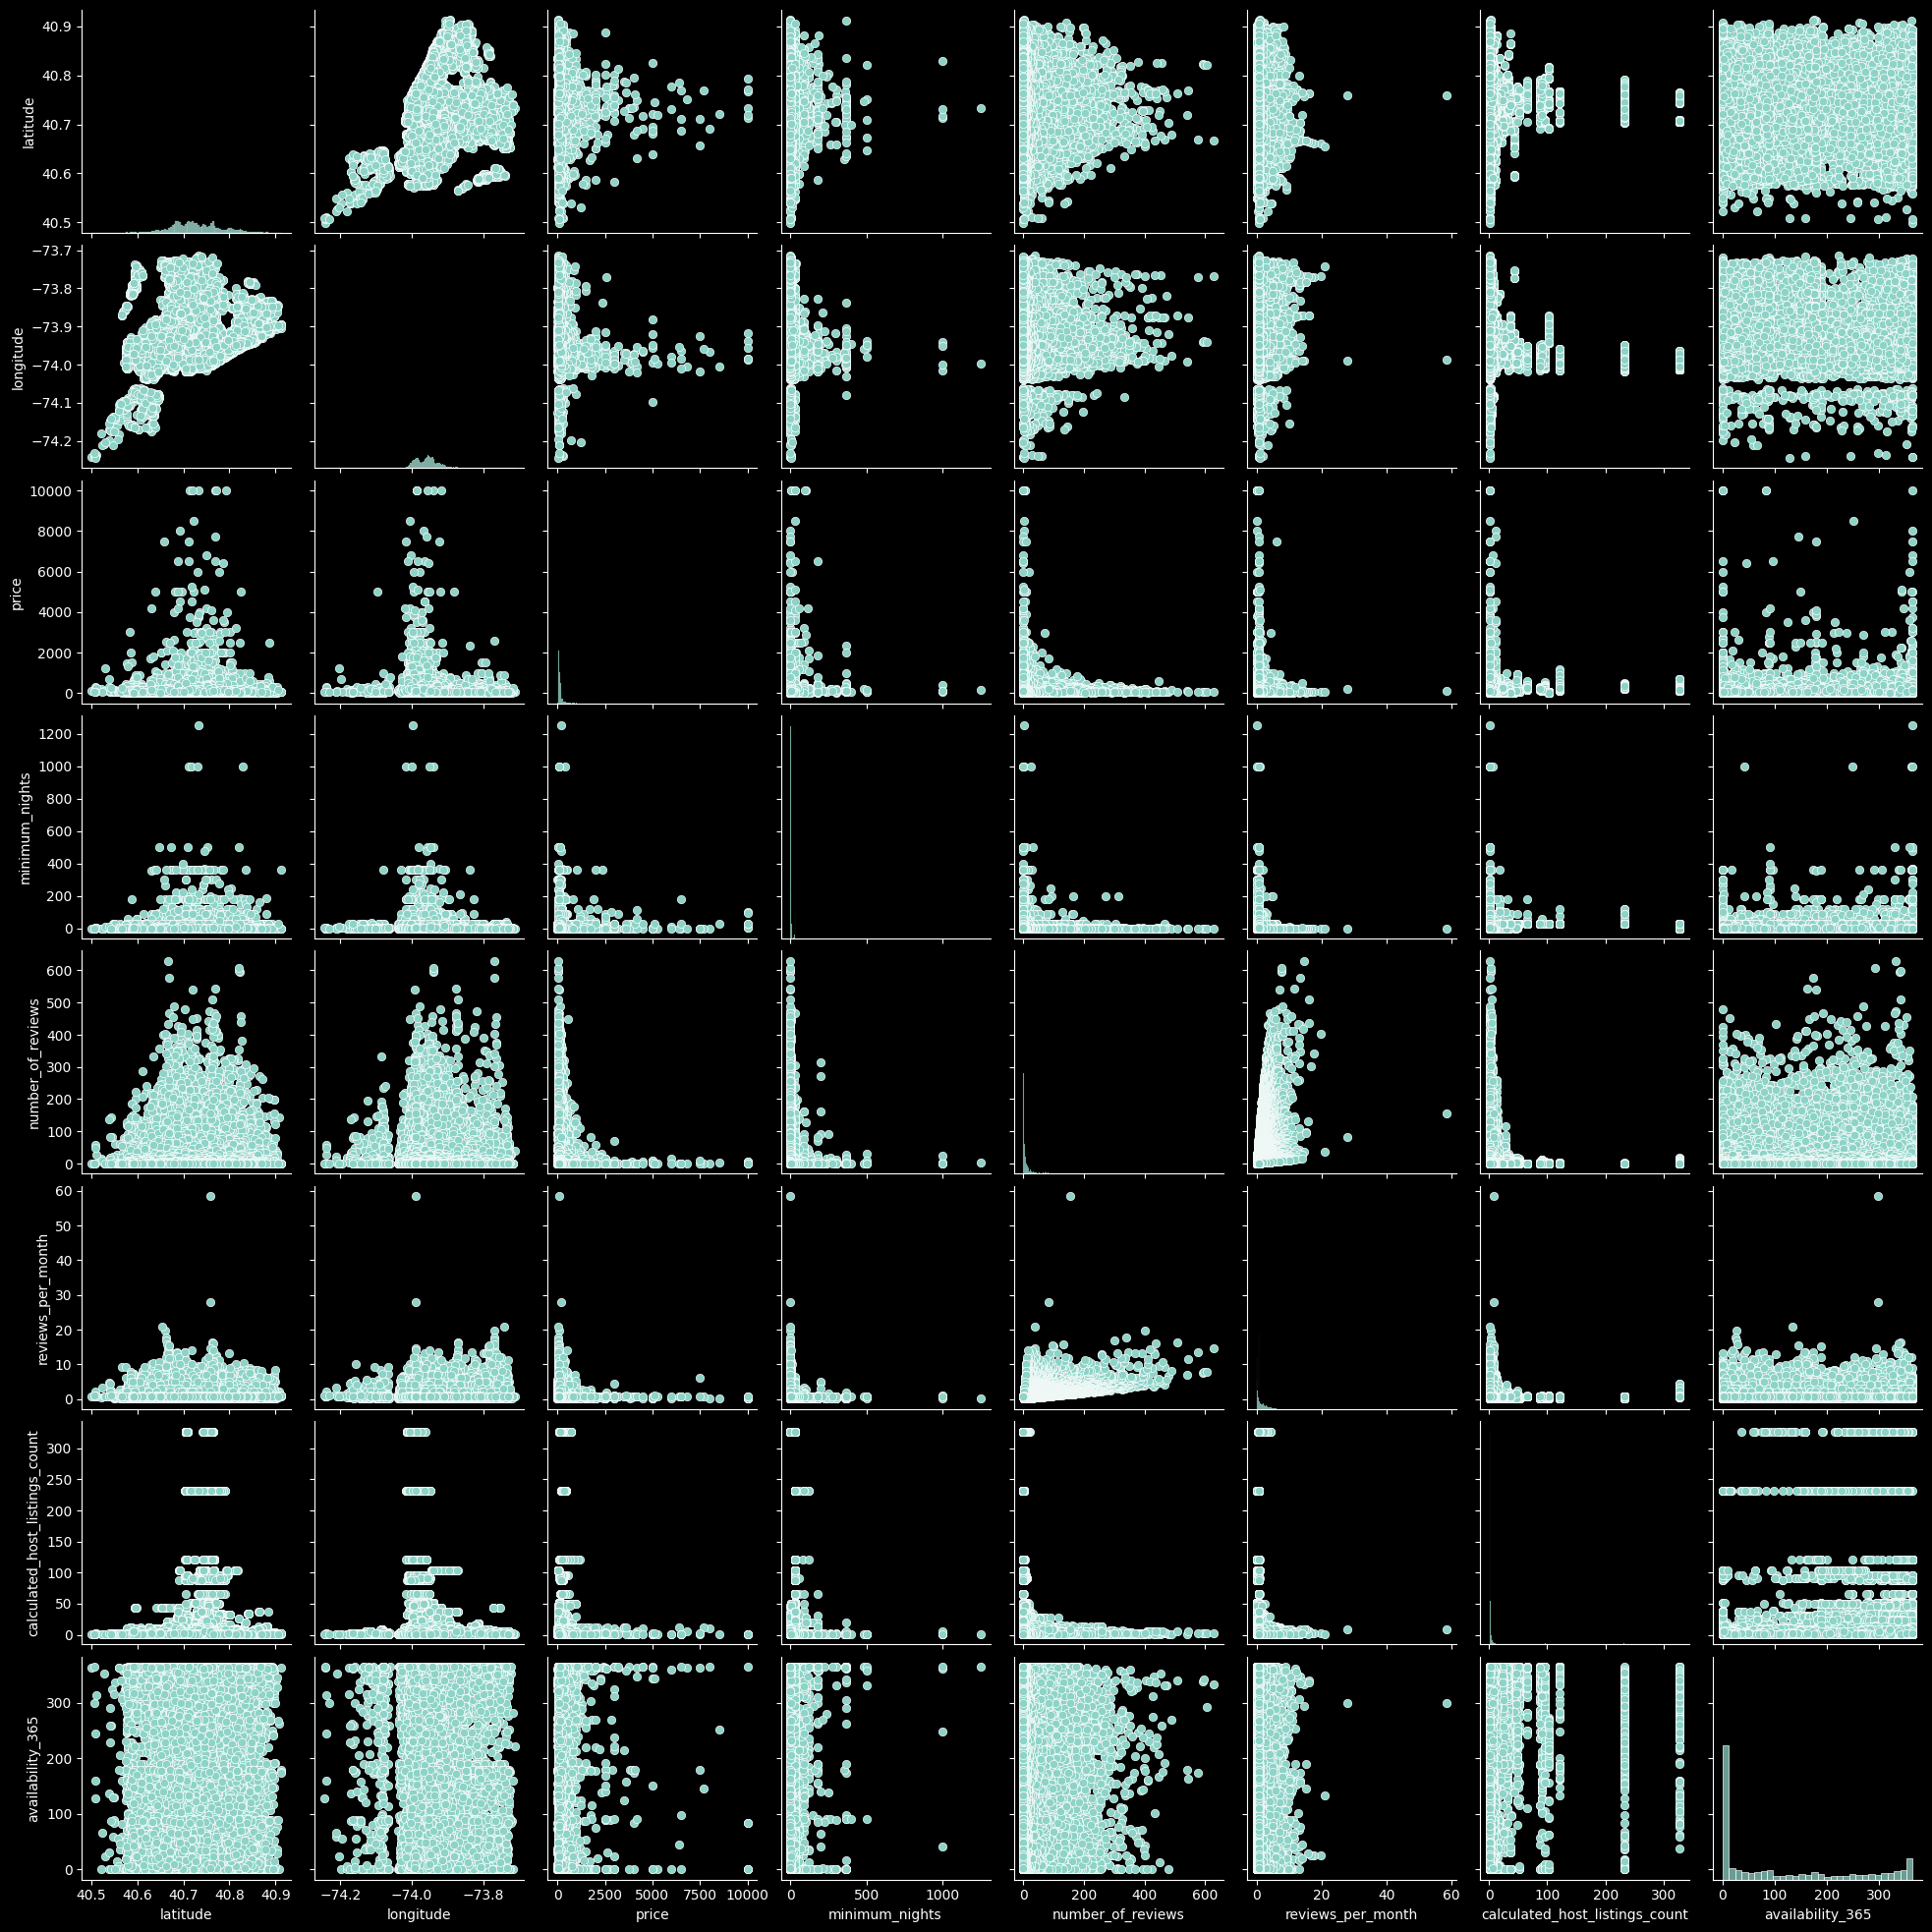

In [18]:
sns.pairplot(df)
plt.show()

### Multivariate Analysis

<Axes: >

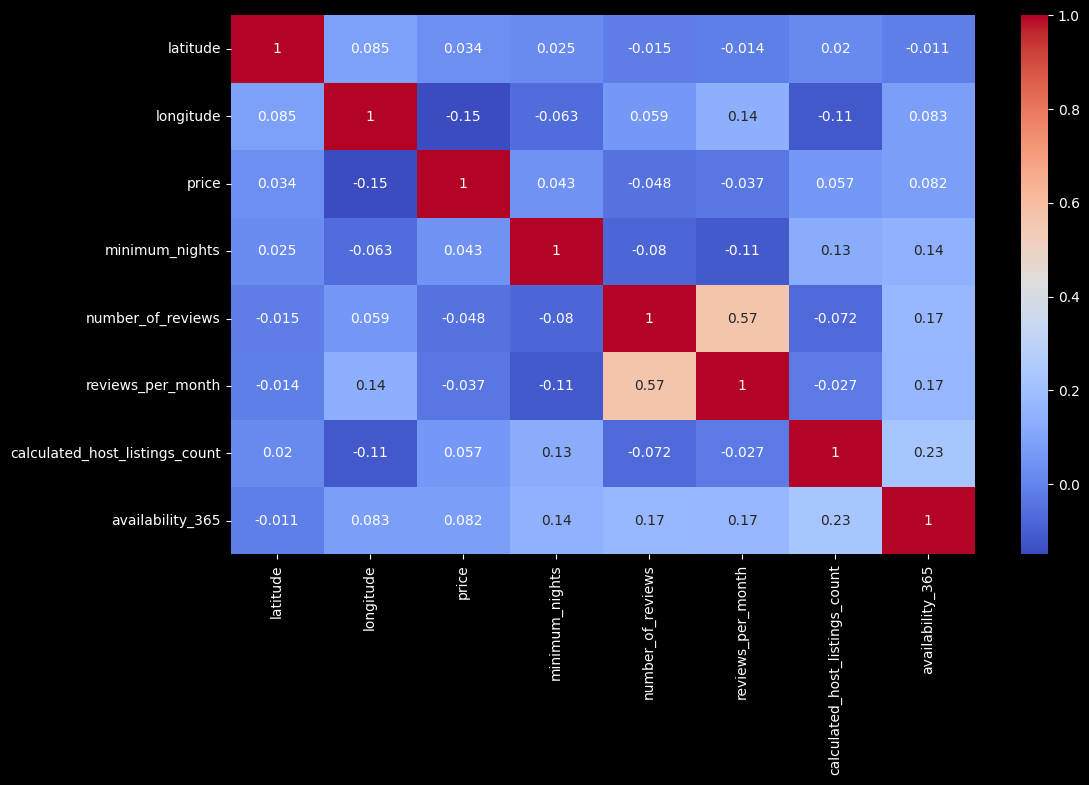

In [19]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.select_dtypes(include = [np.number]).corr(), annot = True, cmap = 'coolwarm')

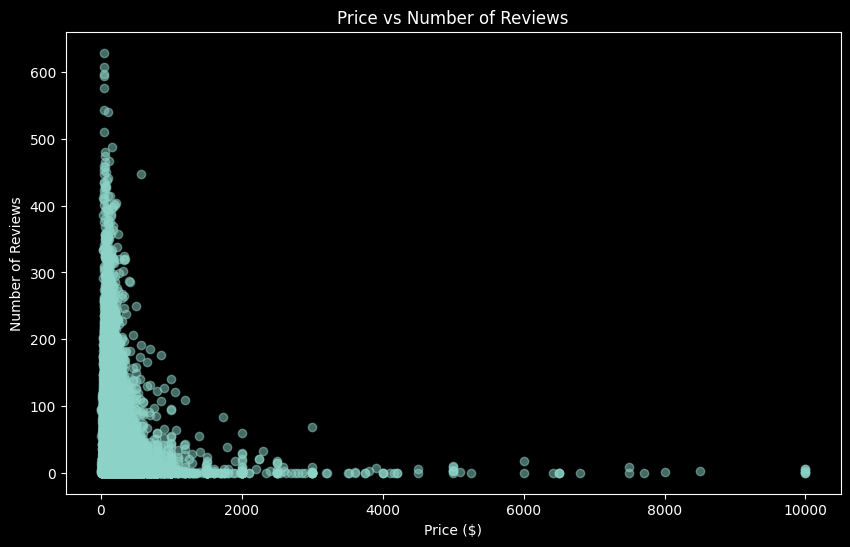

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['price'], df['number_of_reviews'], alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.show()

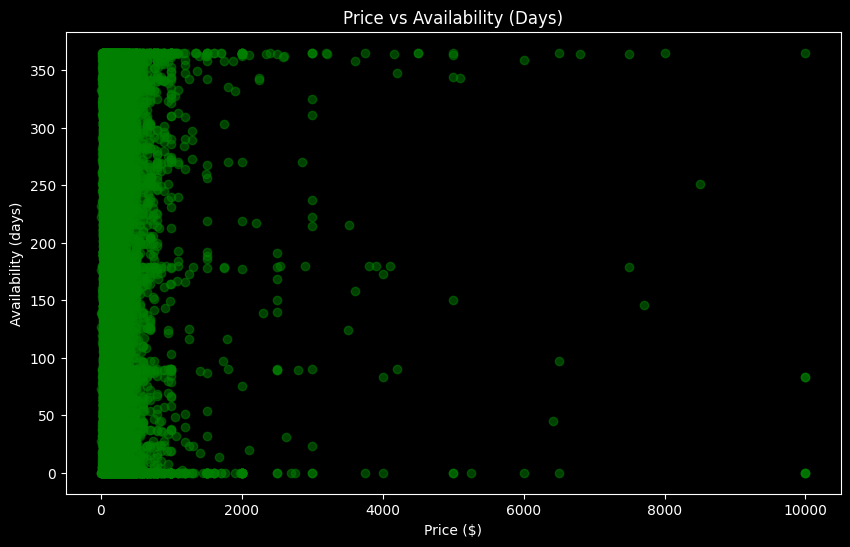

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['price'], df['availability_365'], alpha=0.5, color='green')
plt.title('Price vs Availability (Days)')
plt.xlabel('Price ($)')
plt.ylabel('Availability (days)')
plt.show()


In [22]:
# Converting categorical columns to numerical using One Hot Encoding

categorical_cols = df.select_dtypes(include = [object]).columns.tolist()
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True).astype(int)

In [23]:
# Check the encoded DataFrame

df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,40,-73,149,1,9,0,6,365,1,0,...,0,0,0,0,0,0,0,0,1,0
1,40,-73,225,1,45,0,2,355,0,1,...,0,0,0,0,0,0,0,0,0,0
2,40,-73,150,3,0,0,1,365,0,1,...,0,0,0,0,0,0,0,0,1,0
3,40,-73,89,1,270,4,1,194,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40,-73,80,10,9,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [24]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df =  std_scaler.fit_transform(df)

### K-Means Clusters

In [25]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)

k_means.fit(scaled_df)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [26]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0], shape=(48895,), dtype=int32)

In [27]:
k_means.inertia_

11340484.339409184

In [28]:
# check Inertia score value for clusters from 1 to 10

inertias = []
for i in range(1 , 11):
    k_means = KMeans(n_clusters = i, random_state = 42)
    k_means.fit(scaled_df)
    inertias.append(k_means.inertia_)

In [29]:
inertias

[11392535.00000002,
 11342455.44022341,
 11290490.742515285,
 11155742.767499167,
 11104109.249447713,
 11121351.480383005,
 11072241.476737397,
 10953926.652984524,
 10903188.061303914,
 10849744.50182062]

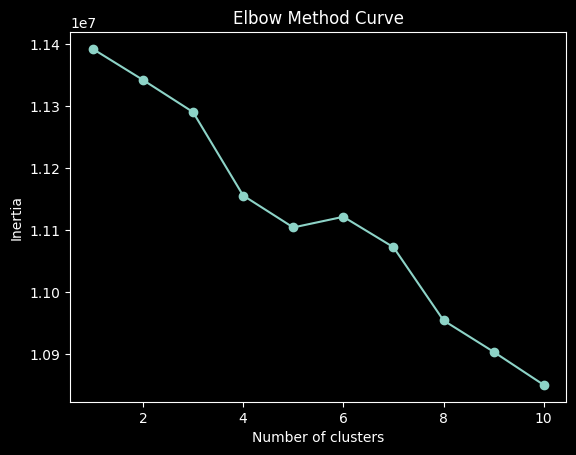

In [30]:
# Plotting Elbow Curve

plt.plot(range(1, 11), inertias, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method Curve')
plt.show()

In [31]:
# By the Elbow Curve the Elbow point can be considered as 5

k_means = KMeans(n_clusters = 5, random_state = 42)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 3, 3, ..., 3, 3, 3], shape=(48895,), dtype=int32)

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(scaled_df, labels)

-0.16780907445009666

In [33]:
silhouette_samples(scaled_df, labels).min()

np.float64(-0.5137893482528314)

In [38]:
import joblib
joblib.dump(KMeans, 'K_Means_Clustering.pkl')

['K_Means_Clustering.pkl']